In [1]:
import numpy as np
from sklearn.mixture import GaussianMixture
from PIL import Image, ImageFilter
import random
import matplotlib.pyplot as plt
import warnings

In [2]:
# Relative Directories
dest = '../data/I-SENSE/1st Exercise/'
save_dest = dest + 'mod/'

In [3]:
# Opening Images
th = Image.open(dest + 'thermal.jpg')
geo = Image.open(dest + 'geographical.jpg')

### Previews:

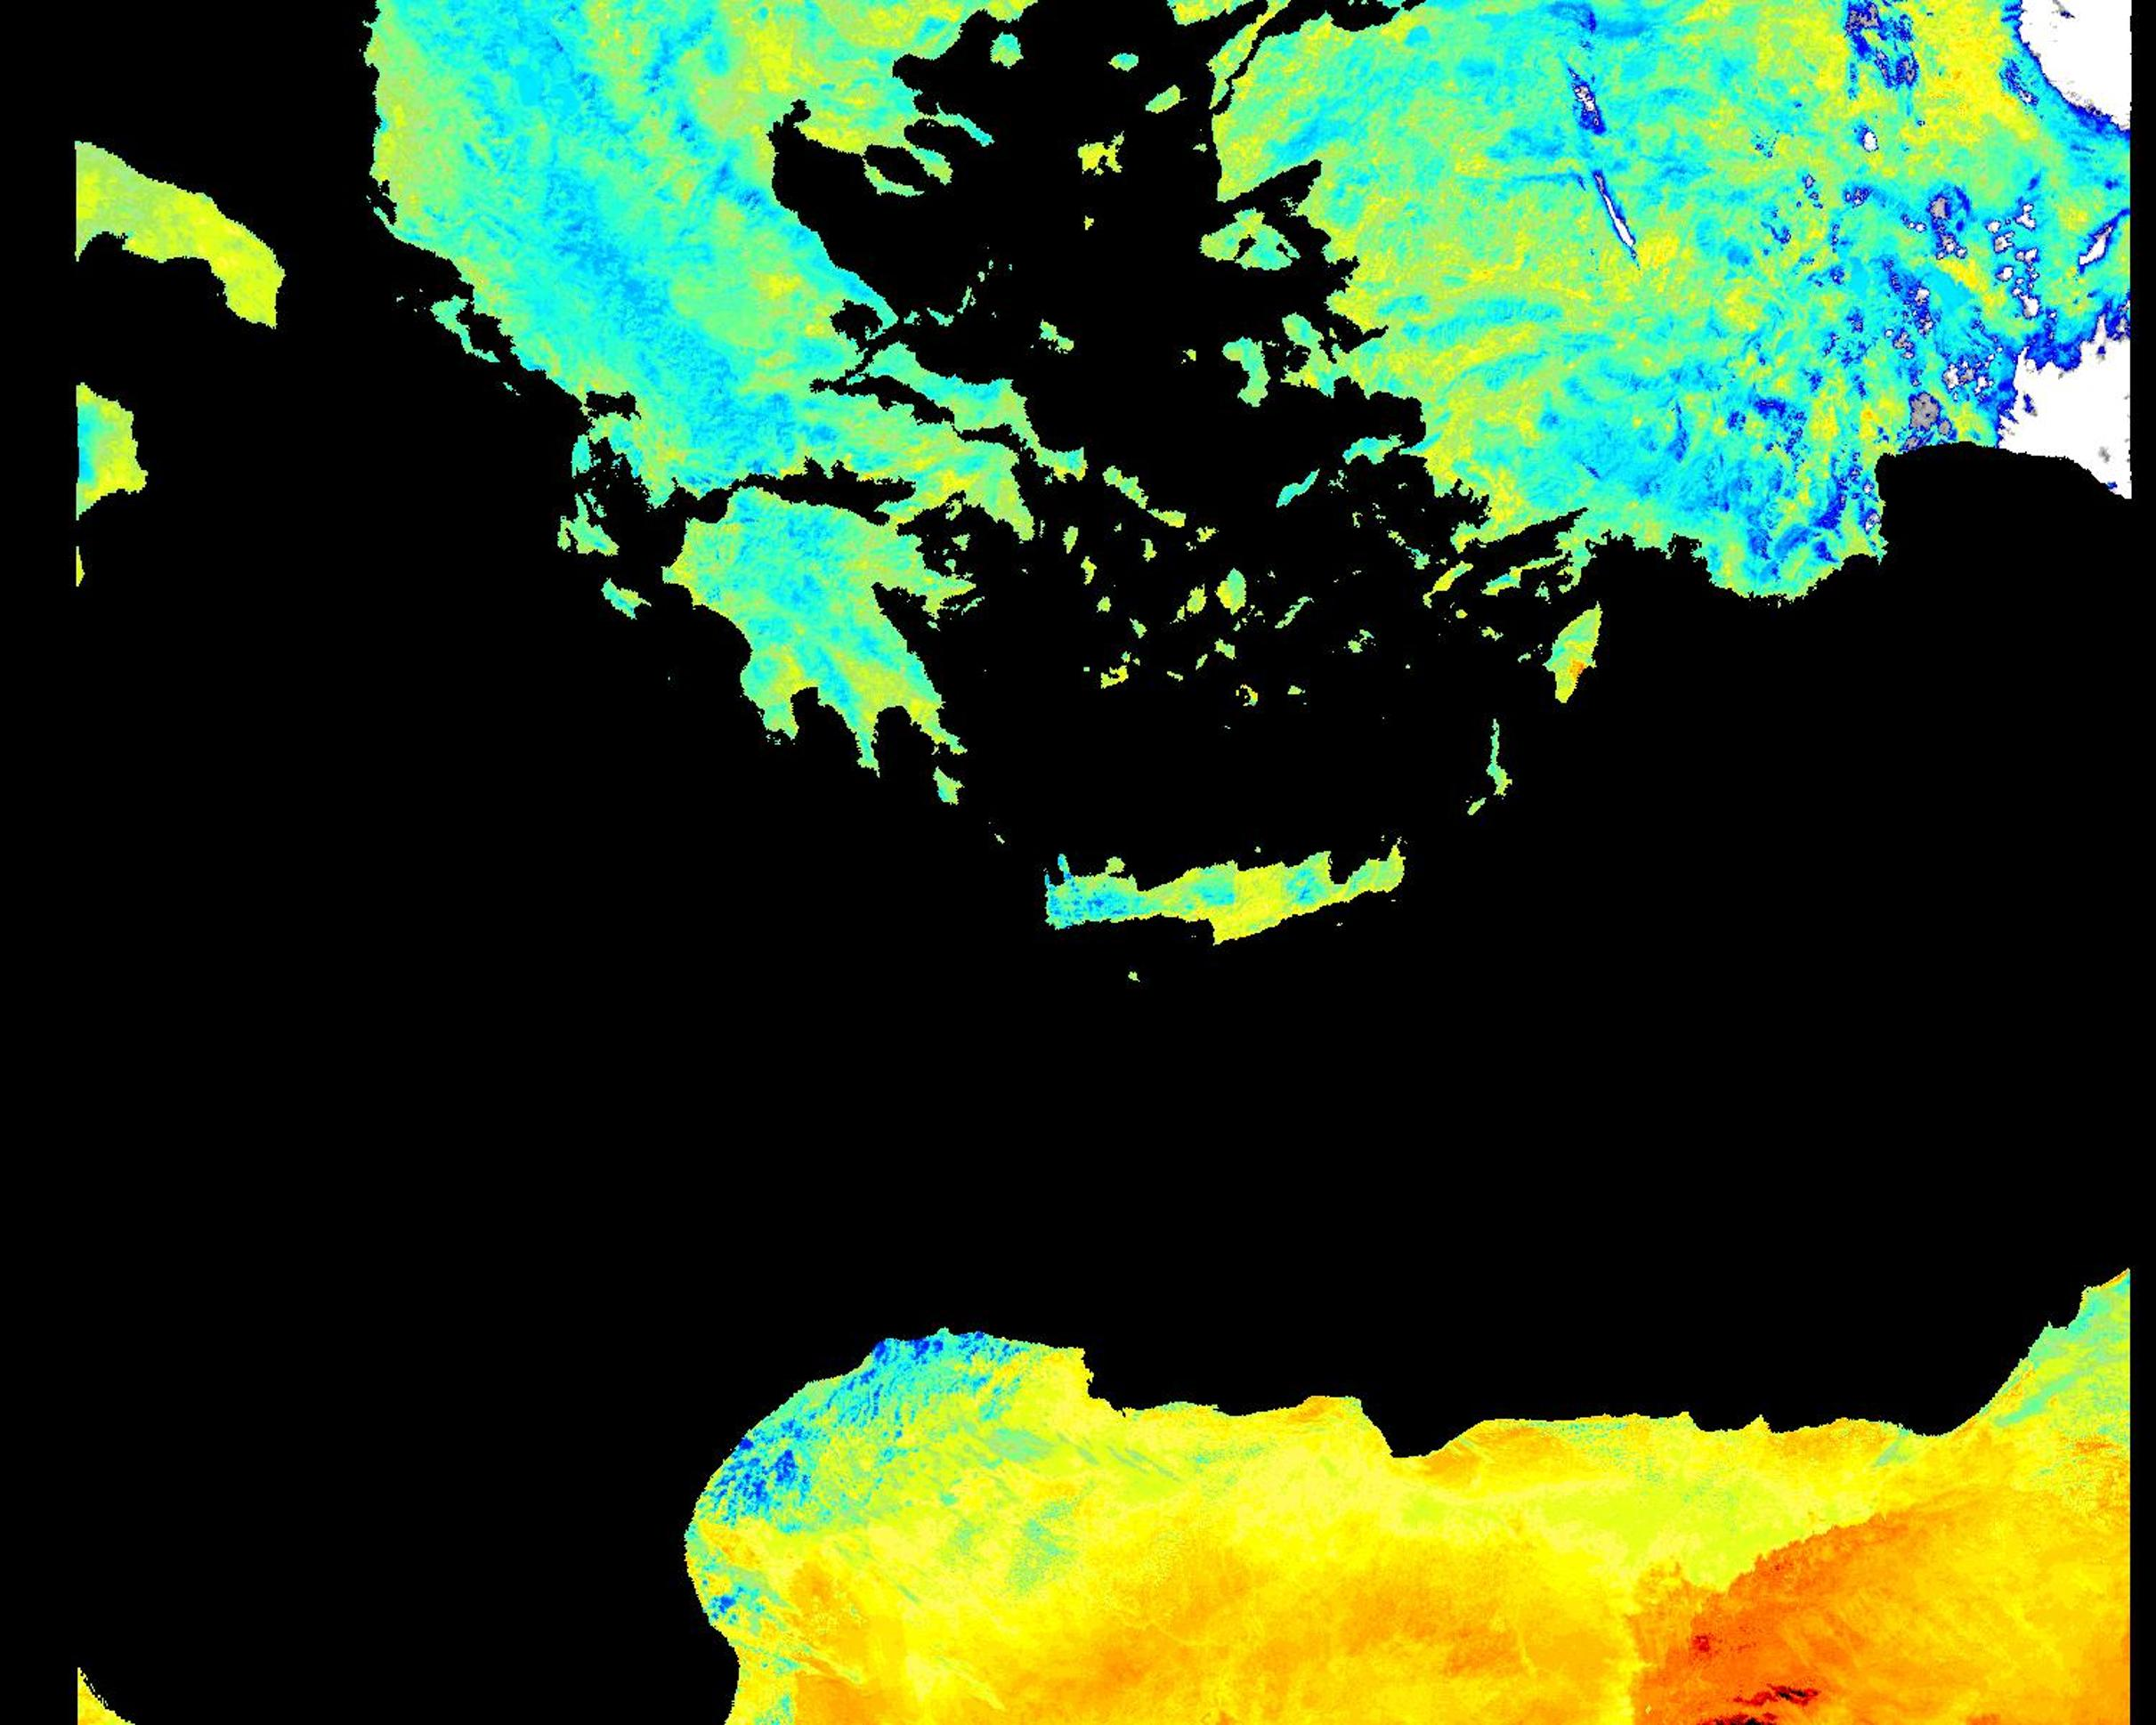

In [4]:
th

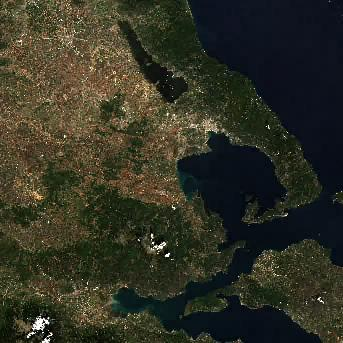

In [5]:
geo

In [6]:
th_mod = th.convert(mode = 'L')
geo_mod = geo.convert(mode = 'L')

### Modified Image Preview:

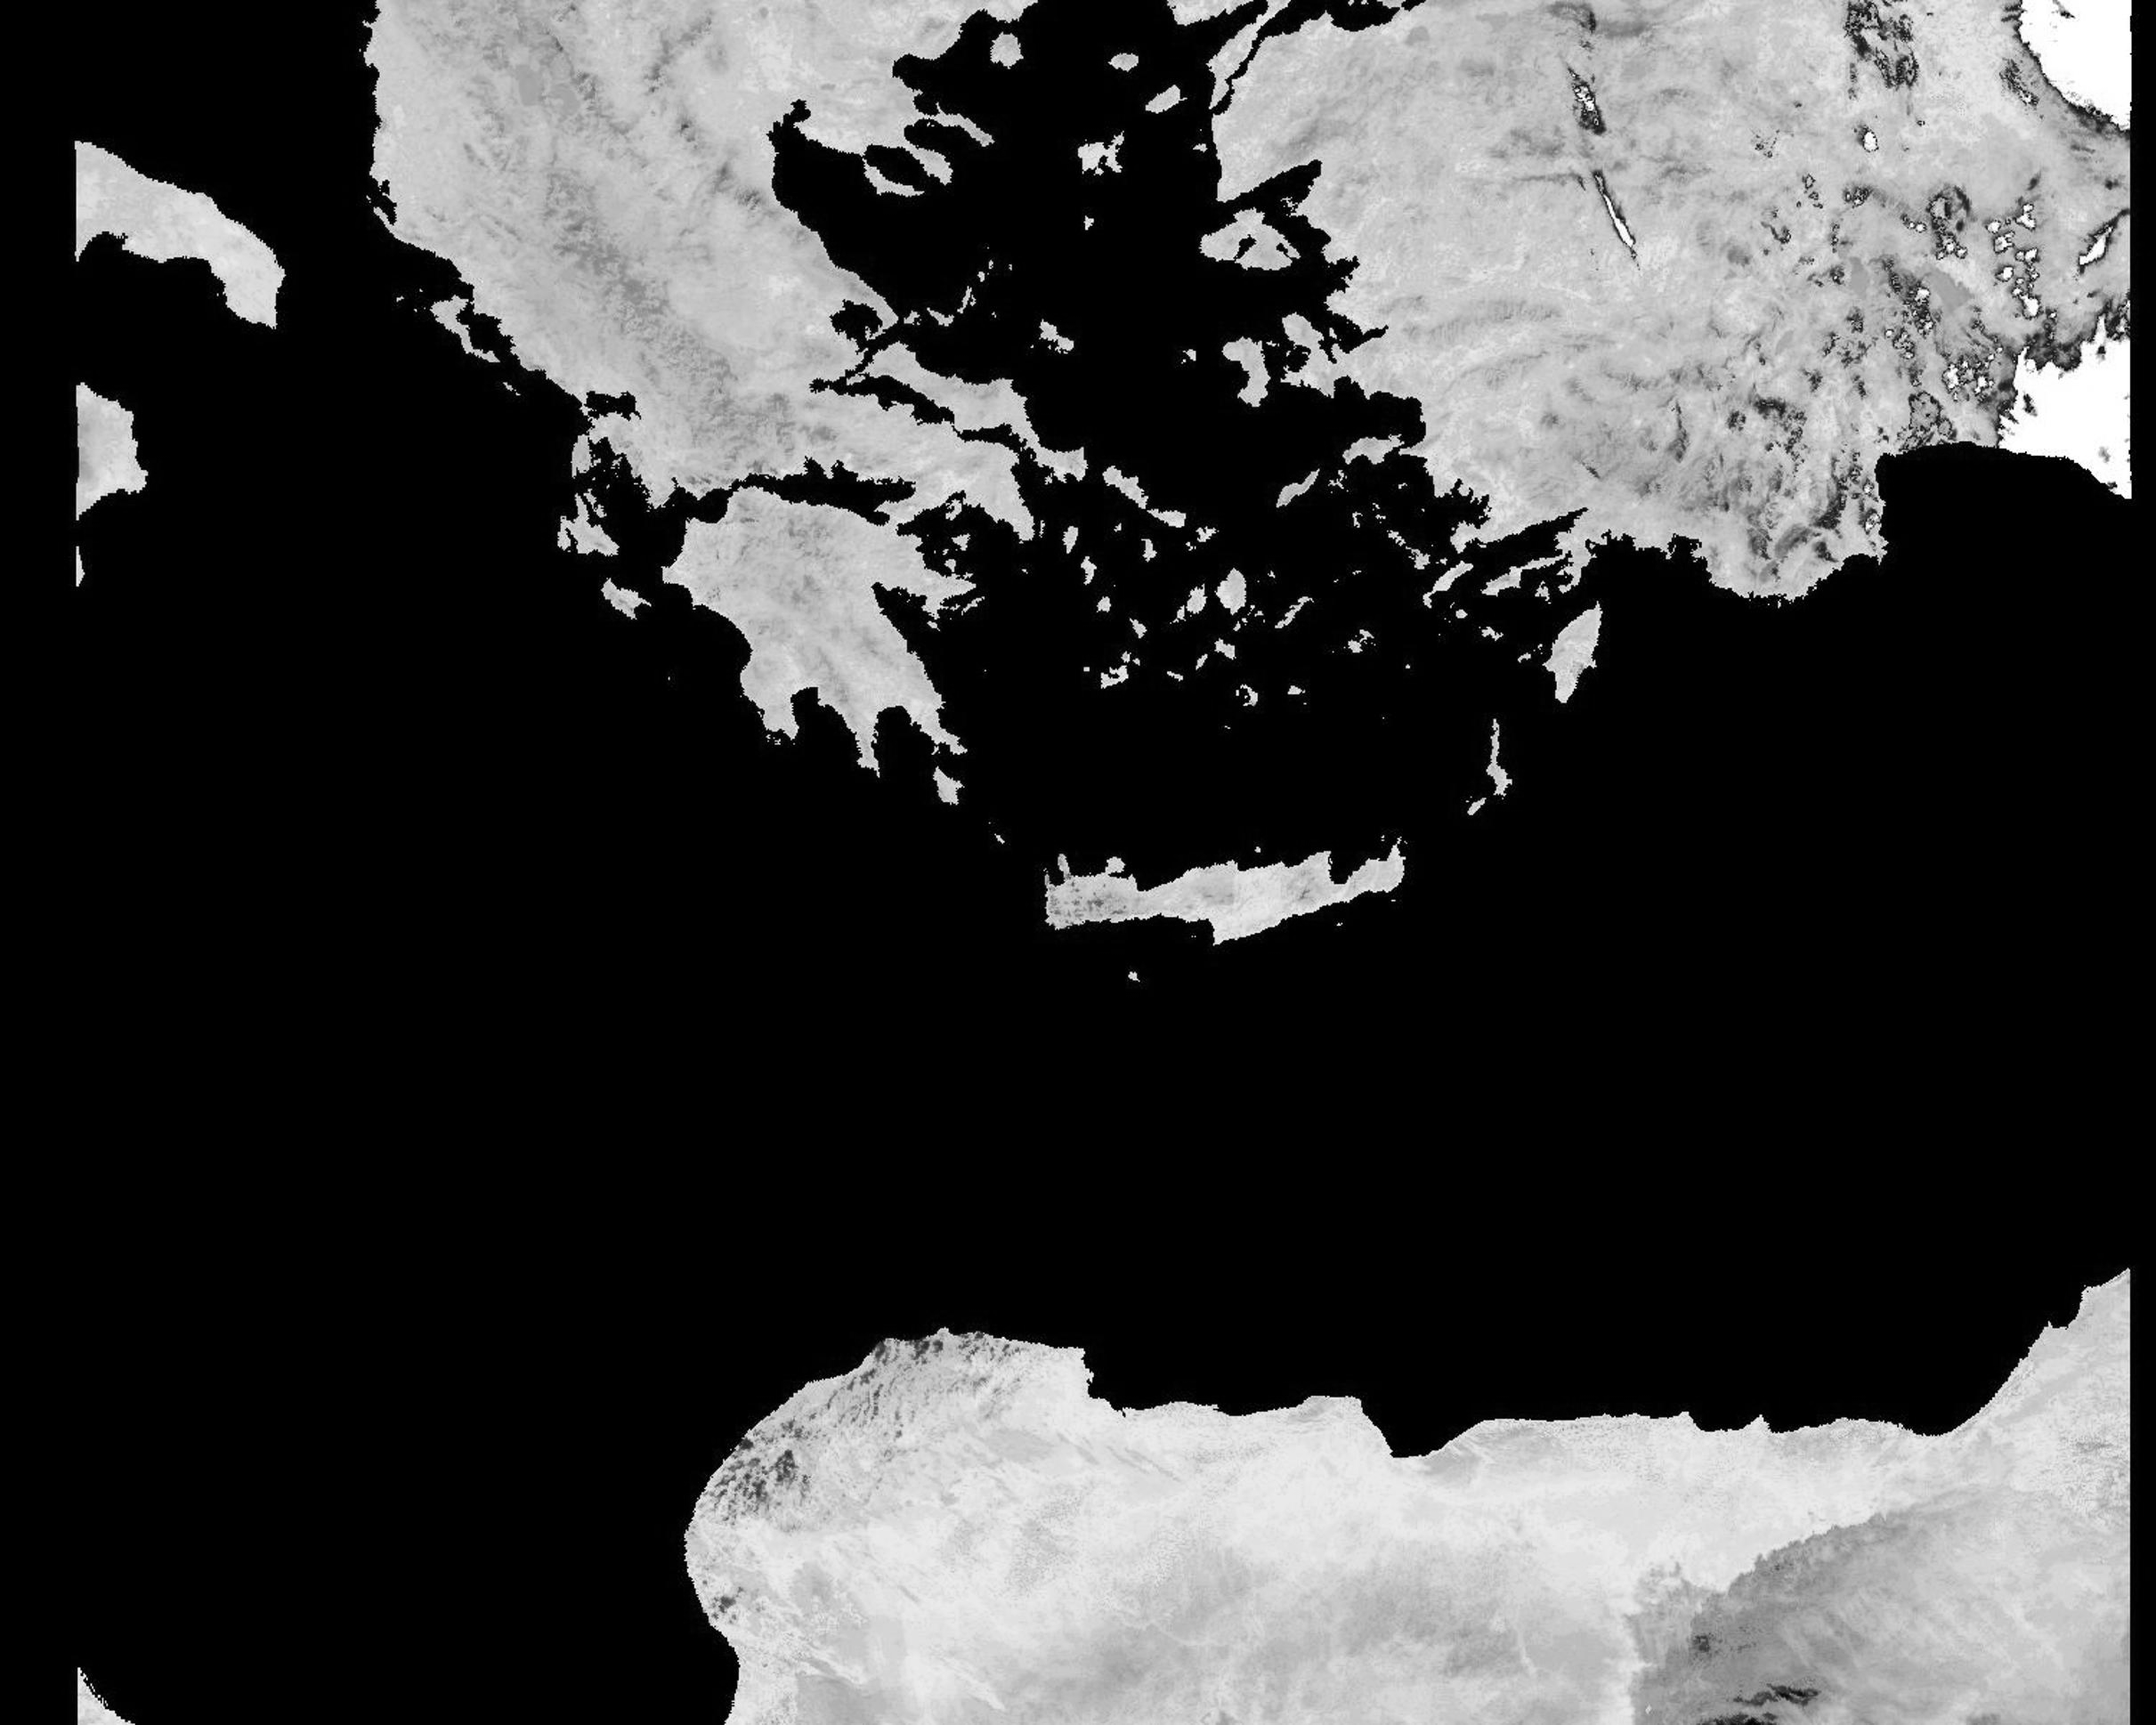

In [7]:
th_mod

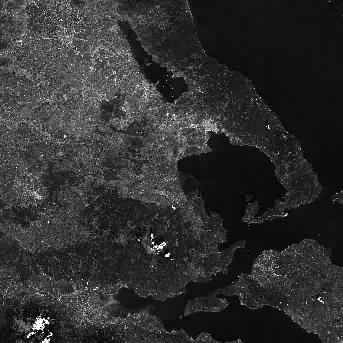

In [8]:
geo_mod

In [9]:
th_blur = th_mod.filter(ImageFilter.GaussianBlur(15))
geo_blur = geo_mod.filter(ImageFilter.GaussianBlur(5))

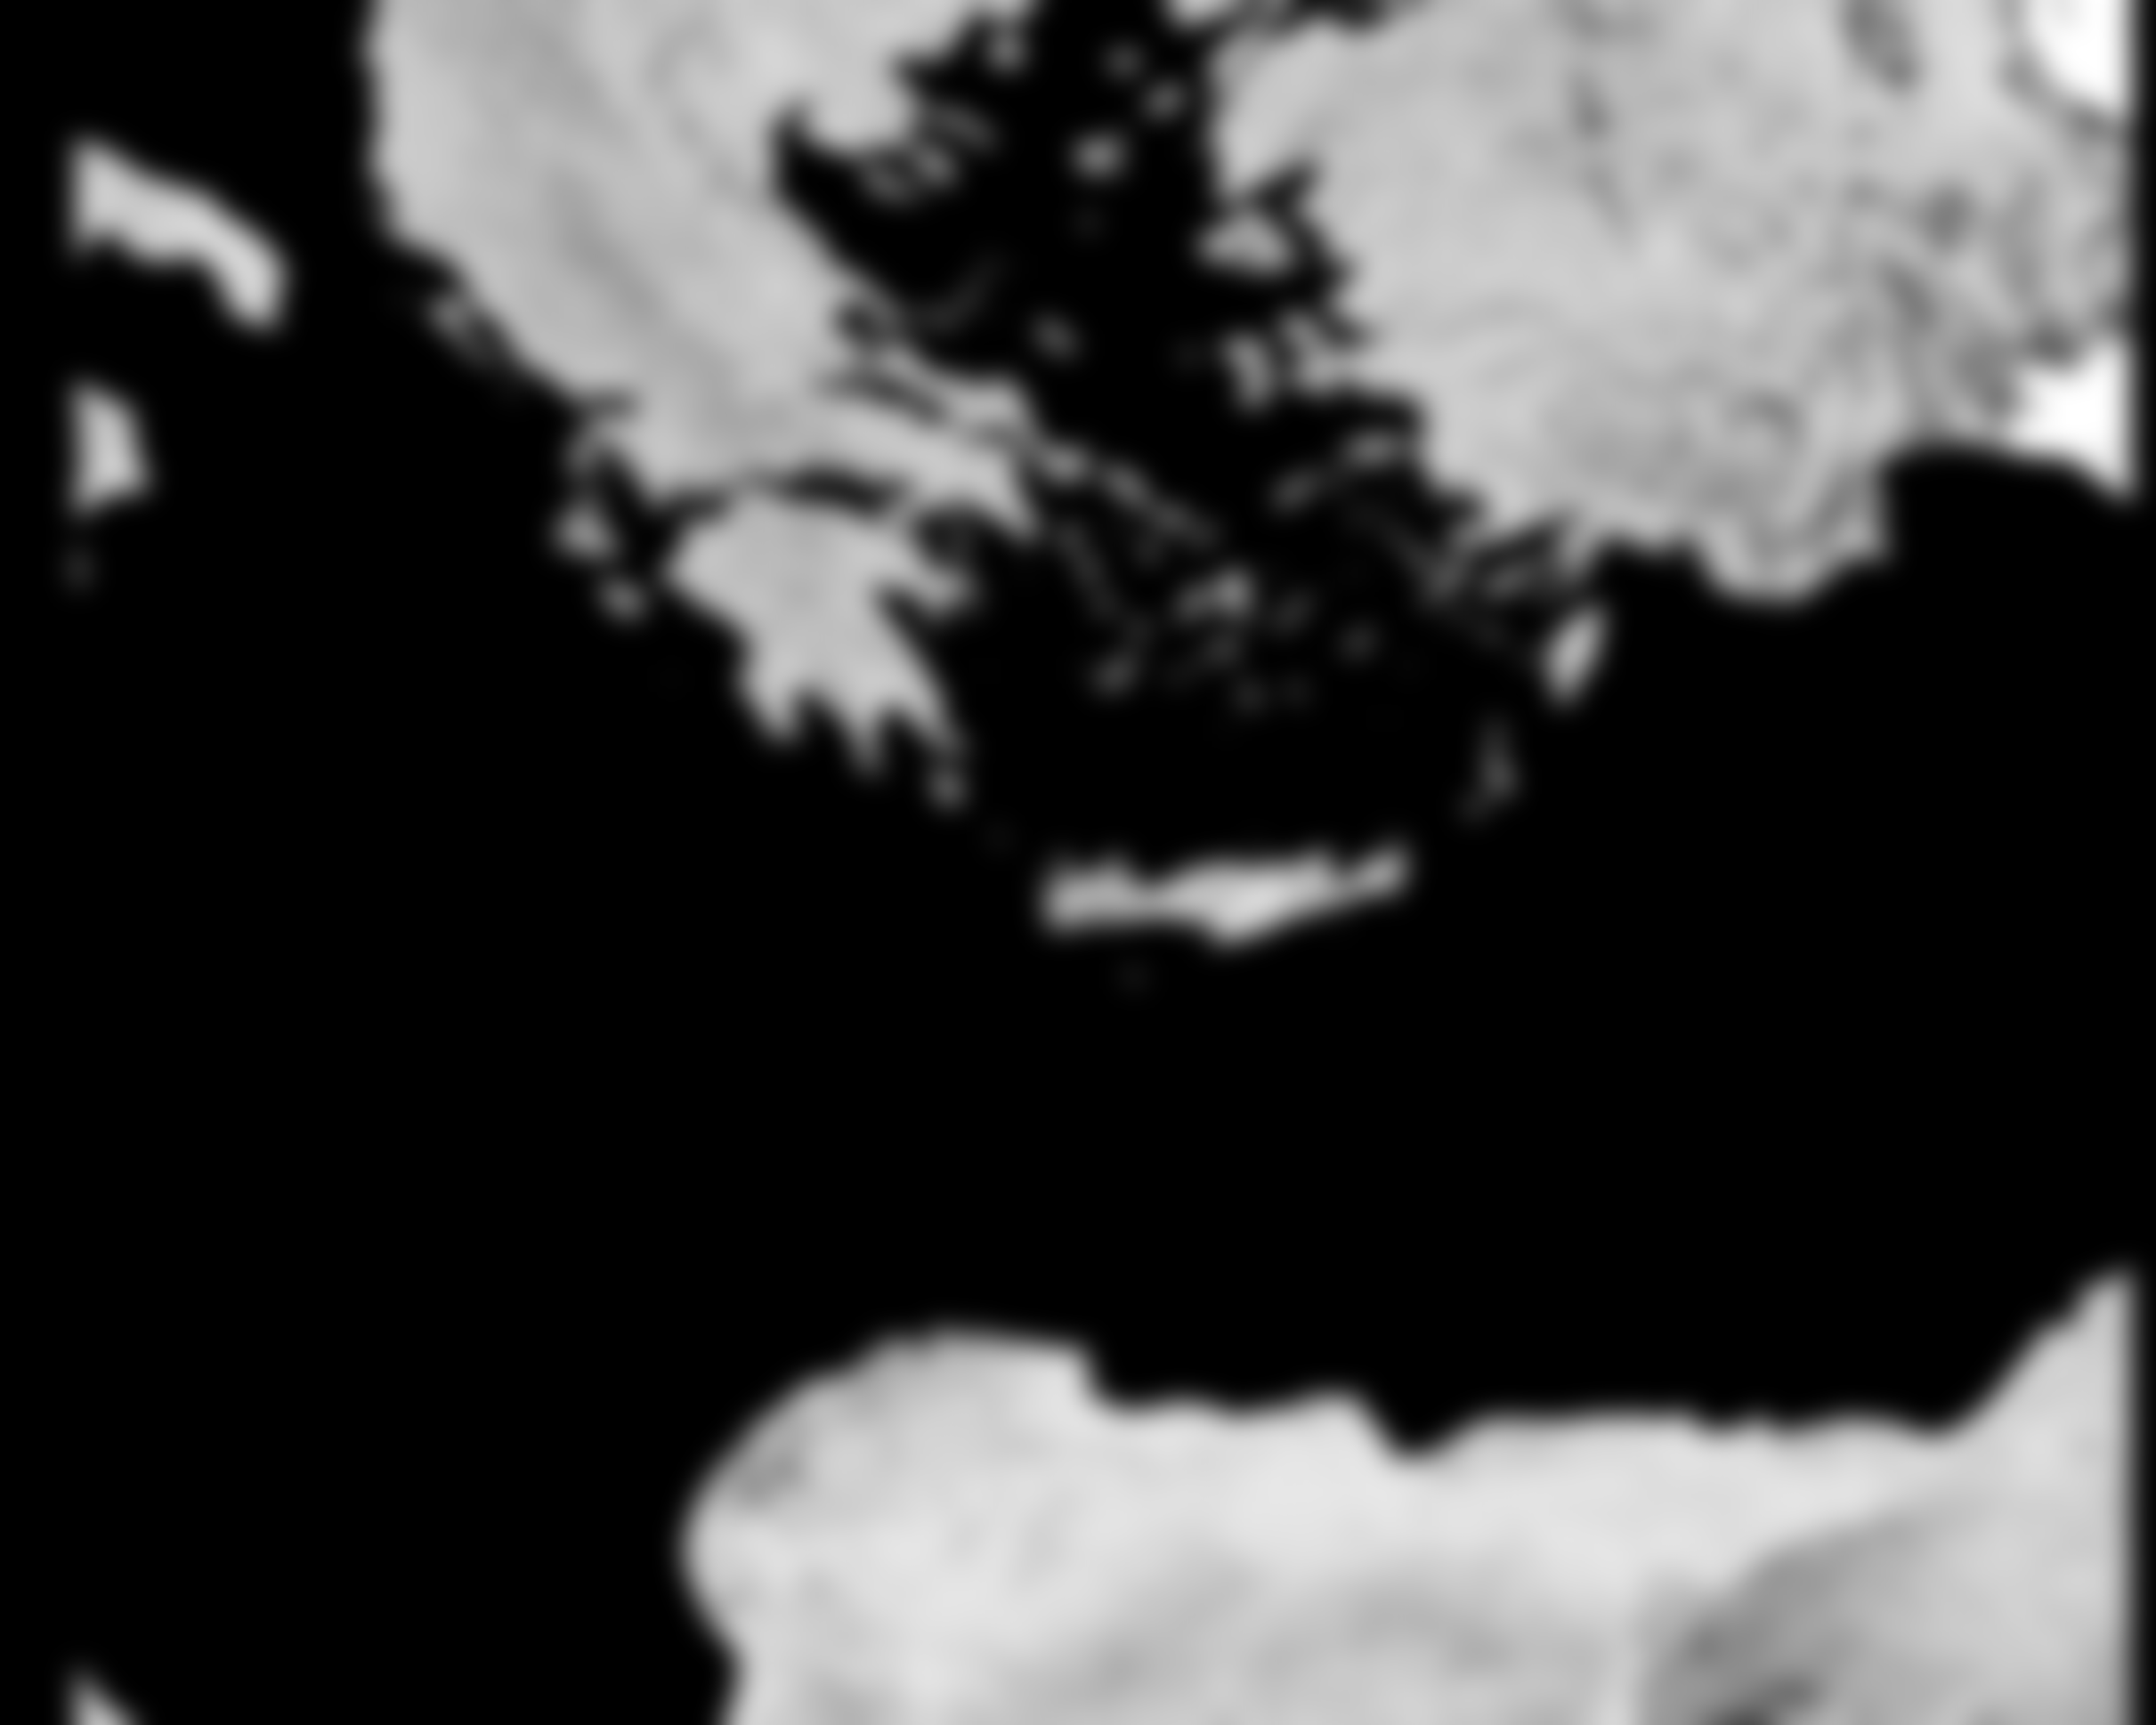

In [10]:
th_blur

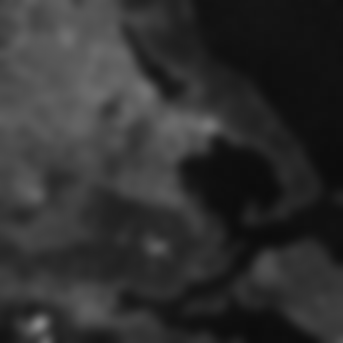

In [11]:
geo_blur

### Weighted Random Sampling:

In [12]:
# Setting up available samples:
th_pixels = th_blur.load()
geo_pixels = geo_blur.load()

th_available_samples = []
th_sample_weights = []
th_samples = []

geo_available_samples = []
geo_sample_weights = []
geo_samples = []



for x in range(th_blur.size[0]):
    for y in range(th_blur.size[1]):
        th_available_samples.append((x, th_blur.size[1] - y - 1))
        th_sample_weights.append(th_pixels[x, y])

for x in range(geo_blur.size[0]):
    for y in range(geo_blur.size[1]):
        geo_available_samples.append((x, y))
        geo_sample_weights.append(geo_pixels[x, geo_blur.size[1] - y - 1])

th_pixels

In [13]:
# Moddifying Weights
th_mod_weights = th_sample_weights
geo_mod_weights = geo_sample_weights

for i, w in enumerate(th_mod_weights):
    th_mod_weights[i] =  th_mod_weights[i]**0.5

for i, w in enumerate(geo_mod_weights):
    geo_mod_weights[i] =  geo_mod_weights[i]**4

In [14]:
# Sampling
th_samples = random.choices(th_available_samples, th_mod_weights, k = 1000)
geo_samples = random.choices(geo_available_samples, geo_mod_weights, k = 1000)

th_samples = np.array(th_samples)
geo_samples = np.array(geo_samples)

### Visualization - Plotting:

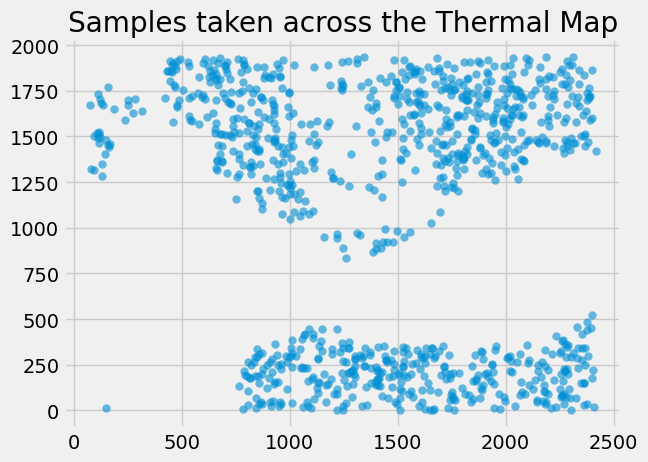

In [15]:
# Thermal
plt.style.use('fivethirtyeight')

plt.scatter(th_samples[:,0], th_samples[:,1], linewidth=0, alpha = 0.6)
plt.title('Samples taken across the Thermal Map')
plt.show()

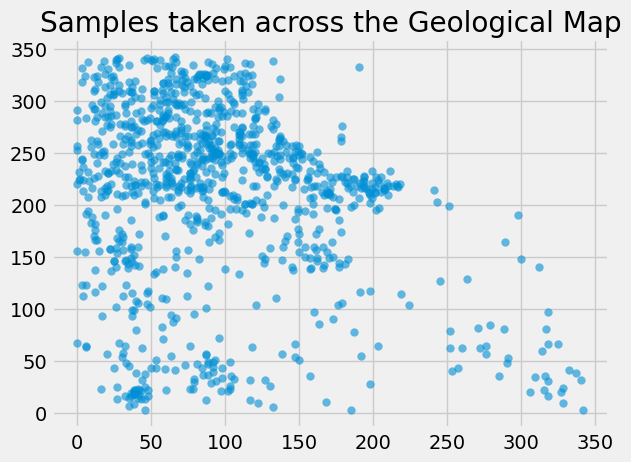

In [16]:
# Geological
plt.style.use('fivethirtyeight')

plt.scatter(geo_samples[:,0], geo_samples[:,1], linewidth=0, alpha = 0.6)
plt.title('Samples taken across the Geological Map')
plt.show()

### Expectation Maximization using GMMs:

In [17]:
th_gm = GaussianMixture(n_components=2, random_state=0).fit(th_samples)
geo_gm = GaussianMixture(n_components=2, random_state=0).fit(geo_samples)

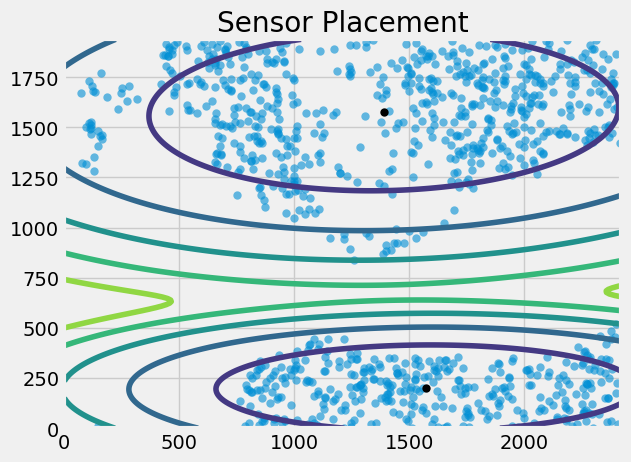

In [18]:
# Thermal Map
X, Y = np.meshgrid(np.linspace(0, th_blur.size[0], 256), np.linspace(0, th_blur.size[1], 256))
XX = np.array([X.ravel(),Y.ravel()]).T
Z = th_gm.score_samples(XX)
Z = -Z.reshape(X.shape)
levels = np.linspace(np.min(Z), np.max(Z), 7)

# plot
fig, ax = plt.subplots()

ax.contour(X, Y, Z, levels=levels)
ax.scatter(th_samples[:,0], th_samples[:,1], linewidth=0, alpha = 0.6)
ax.scatter(th_gm.means_[:,0], th_gm.means_[:,1], c='black', linewidth=0)
plt.title('Sensor Placement')

plt.savefig(save_dest+'Thermal Figure.png')

plt.show()

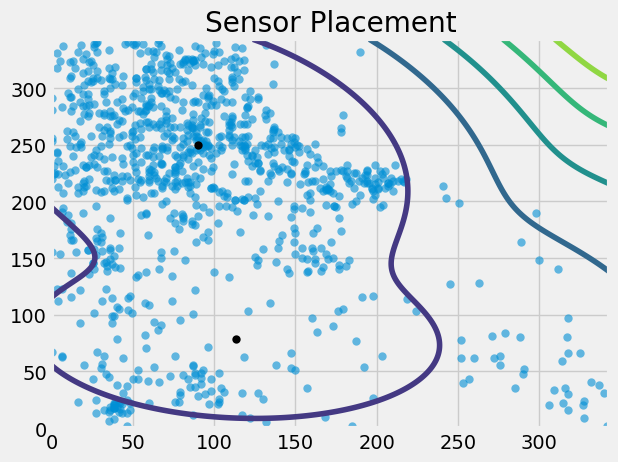

In [19]:
# Geological Map
X, Y = np.meshgrid(np.linspace(0, geo_blur.size[0], 256), np.linspace(0, geo_blur.size[1], 256))
XX = np.array([X.ravel(),Y.ravel()]).T
Z = geo_gm.score_samples(XX)
Z = -Z.reshape(X.shape)
levels = np.linspace(np.min(Z), np.max(Z), 7)

# plot
fig, ax = plt.subplots()

ax.contour(X, Y, Z, levels=levels)
ax.scatter(geo_samples[:,0], geo_samples[:,1], linewidth=0, alpha = 0.6)
ax.scatter(geo_gm.means_[:,0], geo_gm.means_[:,1], c='black', linewidth=0)
plt.title('Sensor Placement')

plt.savefig(save_dest+'Geological Figure.png')

plt.show()

In [20]:
# means
print("Means for Thermal:")
print(th_gm.means_, '\n')

print("Means for Geological:")
print(geo_gm.means_)

Means for Thermal:
[[1389.76677013 1577.32835013]
 [1573.93044301  199.74153287]] 

Means for Geological:
[[113.25135276  79.04554234]
 [ 89.89667654 249.81269486]]


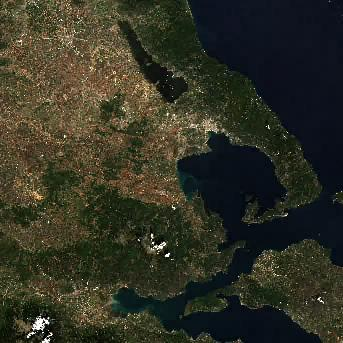

In [21]:
geo
